In [641]:
#Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [642]:
df=pd.read_csv('Advertising Dataset.csv')

In [643]:
#The dataset had a unuseful column named 'Unnamed: 0'
df.head() 

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [644]:
#Dropping the column 'Unnamed: 0'
df.drop('Unnamed: 0',axis=1,inplace=True)

In [645]:
#The Info gives us idea that there are no Null values in any of the columns and total number of data points are 200
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [646]:
#Function to normalise the input features, not the output using the formulae: x = (x - x_min)/(x_max - x_min)
def normalise(df):
    for col in df.columns[:-1]:
        max=df[col].max()
        min=df[col].min()
        df[col]=(df[col]-min)/(max-min)
    return df

In [647]:
df=normalise(df) #Normalising the inputs of our dataset

In [648]:
df.head()

,TV,radio,newspaper,sales
0,0.775786,0.762097,0.605981,22.1
1,0.148123,0.792339,0.394019,10.4
2,0.055800,0.925403,0.606860,9.3
3,0.509976,0.832661,0.511873,18.5
4,0.609063,0.217742,0.510994,12.9


In [649]:
#Function to split the dataset into 75% training and 25% testing datasets, returns train_set and test_set
def dataset_split(df):
    # Shuffling the dataset 
    shuffle_df = df.sample(200)

    # Define a size for your train set 
    train_size = int(0.75 * len(df))

    # Splitting the dataset 
    train_set = shuffle_df[:train_size]
    test_set = shuffle_df[train_size:]
    return train_set, test_set

In [650]:
#Using the above function to split our data
train_set,test_set=dataset_split(df)

In [651]:
training_inputs=train_set[['TV','radio','newspaper']] #Taking input features in training_inputs

In [652]:
training_inputs.head()

,TV,radio,newspaper
37,0.250254,0.995968,0.399296
122,0.755157,0.048387,0.134565
190,0.131214,0.828629,0.048373
173,0.567129,0.143145,0.109938
115,0.251606,0.705645,0.460862


In [653]:
#Getting the training outputs
training_outputs=train_set['sales']
#np.array(training_outputs)

In [654]:
x_bar = training_inputs.mean()
x_bar #3X1 x_bar matrix

TV           0.494388
radio        0.482513
newspaper    0.269792
dtype: float64

In [655]:
training_inputs.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [656]:
#Getting x_tilda by subtracting the mean from the respective feature column values
x_tilda = training_inputs.copy()
for col in training_inputs.columns:
    mean=x_tilda[col].mean()
    x_tilda[col]=x_tilda[col]-mean


In [657]:
y_bar=training_outputs.mean() #mean of training outputs

In [658]:
y_tilda=training_outputs-y_bar #getting 150X1 matrix y_tilda

In [659]:
#function to get the weights or coefficients of the input features
def Lin_reg_weight(x_tilda,y_tilda):
    W = np.matmul(np.linalg.inv((np.dot(x_tilda.T,x_tilda))),np.dot(x_tilda.T,y_tilda).reshape((3,1)))
    return W

In [660]:
#Using the above function to get W
W = Lin_reg_weight(x_tilda,y_tilda)
W

array([[14.0800144 ],
       [ 9.29357198],
       [-0.2294903 ]])

In [661]:
TV_w=W[0][0] #weight for feature TV
radio_w=W[1][0] #weight for feature radio
newspaper_w=W[2][0] #weight for feature newspaper

In [662]:
bias=y_bar-np.dot(W.T,x_bar) # calculating the bias
bias[0]

2.7626446290281166

In [663]:
W #3X1 weight matrix

array([[14.0800144 ],
       [ 9.29357198],
       [-0.2294903 ]])

In [664]:
input_test,output_test = test_set[['TV','radio','newspaper']],test_set['sales'] #extracting input test set and output test set

In [665]:
X=input_test.T #To be used in calculating the predictions(preds), 3XN matrix
X

,33,199,15,99,88,126,9,103,114,51,...,75,164,58,94,38,40,196,186,149,138
TV,0.895840,0.782550,0.658438,0.454853,0.296246,0.024011,0.673318,0.633074,0.262090,0.337166,...,0.054785,0.393980,0.710517,0.360839,0.143389,0.682448,0.316199,0.469395,0.148799,0.143050
radio,0.403226,0.173387,0.961694,0.840726,0.514113,0.784274,0.052419,0.346774,0.943548,0.193548,...,0.881048,0.296371,1.000000,0.282258,0.538306,0.449597,0.098790,0.042339,0.520161,0.522177
newspaper,0.000000,0.073879,0.462621,0.401055,0.642920,0.442392,0.183817,0.154793,0.300792,0.029024,...,0.783641,0.044855,0.328936,0.093228,0.306069,0.275286,0.068602,0.231310,0.178540,0.177661


In [666]:
preds=np.dot(W.T,X)+bias #predictions

In [667]:
#Function to calculate mean squared error
def MSE(outputs,preds):
    MSE=np.sum(np.square(outputs-preds))/len(outputs)
    return MSE

In [668]:
outputs=np.array(output_test).T #changing the output_test shaped array to its transpose for easier manipulation and for 
                                #dimensional violations

In [669]:
print('Mean Squared Error of Simple Regression is ',MSE(outputs,preds)) #MSE obtained through my code 

Mean Squared Error of Simple Regression is  2.5003105063294853


In [670]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(training_inputs, np.array(training_outputs).T)
preds2=model.predict(input_test)
print('Mean Squared Error of Simple Regression Using library is ',MSE(outputs,preds)) #MSE obatined using the library

Mean Squared Error of Simple Regression Using library is  2.5003105063294853


## As you can see the above two MSE's, they are exactly the same which proves that the coded algorithm works correctly

In [671]:
b=model.intercept_
coeff=model.coef_
print('The bias and the coefficients are respectively ',bias ,' and ', W.T,' without using libraries')
print('The bias and the coefficients are respectively ',[b] ,' and ', coeff,' with using libraries')

The bias and the coefficients are respectively  [2.76264463]  and  [[14.0800144   9.29357198 -0.2294903 ]]  without using libraries
The bias and the coefficients are respectively  [2.7626446290281255]  and  [14.0800144   9.29357198 -0.2294903 ]  with using libraries


## The above values of b and coeff further proves that the algorithm has worked correctly

In [672]:
Lambdas = [0.5, 1, 5, 10, 50, 100] #List of Tradeoff parameters

# Ridge Regression for different values of lambda

## To calculate the weights(WR), biasR, predsR and MSE for all the lambda 

In [673]:
weights={} #dictionary to keep the weights(value) for each of the lambdas(key) 
mse={} #dictionary to keep the MSE(value) for each of the lambdas(key) 
I = np.identity(X.shape[0]) #Identity matrix, 3X3
for Lambda in Lambdas:
    WR = np.matmul(np.linalg.inv((np.dot(x_tilda.T,x_tilda))+Lambda*I),np.dot(x_tilda.T,y_tilda).reshape((3,1)))
    weights[Lambda]=WR
    biasR=y_bar-np.dot(WR.T,x_bar)
    predsR=np.dot(WR.T,X)+biasR
    mse[Lambda]=MSE(outputs,predsR)
    print('For Lambda =',Lambda,', MSE is', MSE(outputs,predsR) )

For Lambda = 0.5 , MSE is 2.3461118493966757
For Lambda = 1 , MSE is 2.2553797452216595
For Lambda = 5 , MSE is 2.7041013544900783
For Lambda = 10 , MSE is 4.1790929828805465
For Lambda = 50 , MSE is 11.67037905434314
For Lambda = 100 , MSE is 14.63111645169292


## Plotting the Variation of coefficients of features with the variation in Lambda

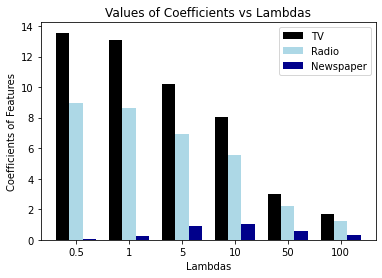

In [674]:
arr_TV=[] #To store the coefficients of feature 'TV'
arr_radio=[]
arr_newspaper=[]
for lamb in Lambdas:
    arr_TV.append(weights[lamb][0][0])
    arr_radio.append(weights[lamb][1][0])
    arr_newspaper.append(weights[lamb][2][0])
w=0.25
x=['0.5','1','5','10','50','100']
TV=arr_TV
radio=arr_radio
newspaper=arr_newspaper
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]
plt.bar(bar1,TV,w,label='TV',color='black')
plt.bar(bar2 ,radio,w,label='Radio',color='lightblue')
plt.bar(bar3,newspaper,w,label='Newspaper',color='darkblue')
plt.xlabel('Lambdas')
plt.ylabel('Coefficients of Features')
plt.xticks(bar1+w,x)
plt.title('Values of Coefficients vs Lambdas')
plt.legend()
plt.show()

## To calculate MSE for lambda values 0.5,1,2,....,100, and to plot a smooth MSE vs lambda

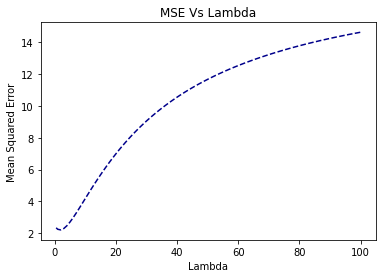

In [680]:
weights1={}
mse1=[]
Lambdas1=[i for i in range(0,101,1)] #for lambdas 0.5,1,2....1000
Lambdas1[0]=Lambdas1[0]+0.5
for Lambda in Lambdas1:
    WR1 = np.matmul(np.linalg.inv((np.dot(x_tilda.T,x_tilda))+Lambda*I),np.dot(x_tilda.T,y_tilda).reshape((3,1)))
    weights1[Lambda]=WR1
    biasR1=y_bar-np.dot(WR1.T,x_bar)
    predsR1=np.dot(WR1.T,X)+biasR1 
    mse1.append(MSE(outputs,predsR1)) #saving the mse values in the list mse1
    #print('For Lambda = ',Lambda, 'MSE is', MSE(outputs,predsR1) )
plt.plot(Lambdas1,mse1,color='darkblue', linestyle='dashed')
plt.title('MSE Vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.show()

## Lasso Regression to find the most important feature

In [681]:
from sklearn.linear_model import Lasso
model=Lasso(alpha=1).fit(training_inputs, training_outputs)
predsL=model.predict(input_test)
MSE(outputs,predsL) #The MSE would be a bit on the upside here, due to the dependence of just one variable as it can be seen
#in the below code for coefficients, only one feature is important, or rather that feature is most important

14.172359816874927

In [677]:
coeffL=model.coef_
coeffL

array([3.20041637, 0.        , 0.        ])

## As you can see the respective coefficients of 'TV', 'radio' and 'newspaper' above, here the coefficients of radio and newspaper are 0 where as that of TV is 3.2, which further says that the most important feature input is investment for advertisements on TV for the total sales

In [679]:
#NOTE: The coefficients could be changed in the next run due to variation in the training dataset and testing dataset